# Gather Starling Data
#### Date: 8/30/2022, JX
> Gather local starling data from https://doi.org/10.5281/zenodo.3237218 and get amplitude envelopes


In [1]:
from starling_rhythm.utils.paths import DATA_DIR

## Get list of wavs

In [2]:
from scipy.io.wavfile import read

In [3]:
from pathlib2 import Path
from glob import glob

In [4]:
wav_paths = list(Path(DATA_DIR).rglob("20*.wav"))

## Write dataframe

In [6]:
import pandas as pd

In [7]:
wavs = pd.DataFrame(
    {
        'wavs': wav_paths
    }
)

In [8]:
wavs

,wavs
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...


In [9]:
str(wavs['wavs'].values[1]).split('/')[-3]

'b1053'

In [54]:
bID = []
for index, row in wavs.iterrows():
    bID.append(str(row['wavs']).split('/')[-3])
    
wavs['bID'] = bID

In [11]:
wavs

,wavs,bID
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145


## calculate tMF

In [12]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

/tmp/ipykernel_33123/123448108.py:2: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [13]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [ ]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(wavs['wavs'], desc = 'getting all the real ones')
    )

getting all the real ones:   2%|▏         | 168/10499 [04:01<5:04:58,  1.77s/it]/home/AD/j8xing/anaconda3/envs/starling_rhythm/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
getting all the real ones:  28%|██▊       | 2940/10499 [2:02:15<5:18:14,  2.53s/it]

In [ ]:
wavs['tmf'] = tmfs

In [157]:
wavs

,wavs,bID,tmf
0,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,18.110849
1,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,17.681803
2,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,23.377868
3,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,59.613643
4,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1053,-10.628535
...,...,...,...
10494,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,58.918929
10495,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.320992
10496,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.872074
10497,/mnt/cube/Datasets/public_ds_starlings_ts_2019...,b1145,46.766811


In [ ]:
from starling_rhythm.utils.paths import PROCESSED_DIR, ensure_dir
SAVE_PATH = PROCESSED_DIR / 'starling_zenodo_2019_revised.pickle'
ensure_dir(SAVE_PATH)

In [ ]:
wavs.to_pickle(SAVE_PATH)

In [36]:
select = pd.read_pickle(PROCESSED_DIR / 'starling_zenodo_2019_revised.pickle')[['bID', 'tmf']]

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorednoise as cn

In [26]:
colors = []
sigs = []

## for every color
for beta, color in zip([0], ['white']):
    ## generate 100
    for n in np.arange(0, 100):
        samples = 1200000 # number of samples to generate
        sigs.append(cn.powerlaw_psd_gaussian(beta, samples))
        colors.append(color)

In [27]:
noises = pd.DataFrame(
    {
        'colors' : colors,
        'sigs' : sigs
    }
)

In [28]:
noises

,colors,sigs
0,white,"[-0.2968179838761641, 0.12247055315846457, 0.7..."
1,white,"[-0.6864813560001914, 1.0530805280287787, 0.73..."
2,white,"[-0.4968696981894202, 0.8925912314047305, 0.60..."
3,white,"[0.1975937646272498, -0.34589931219542785, -0...."
4,white,"[0.06600424198530792, -0.6874697814601421, -0...."
...,...,...
95,white,"[0.10569803132208608, 0.40103350845483415, 0.3..."
96,white,"[-0.3987321352623238, 0.18653248363291303, -0...."
97,white,"[1.075238999389633, -0.7429962022897235, -0.53..."
98,white,"[0.24627511919918812, -0.6332943098432945, 0.4..."


In [38]:
select['type'] = 'starling'

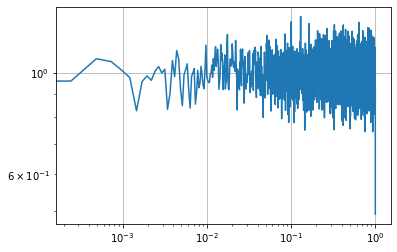

In [29]:
# optionally plot the Power Spectral Density with Matplotlib
from matplotlib import mlab
from matplotlib import pylab as plt

y = noises[noises['colors'] == 'white'].sigs.values[0]

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()

In [30]:
from joblib import Parallel, delayed
from tqdm.autonotebook import tqdm

In [31]:
from starling_rhythm.mfdfa import tmf
n_jobs = 42
verbose = 0

In [102]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    tmfs = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(noises['sigs'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:54<00:00,  1.84it/s]


In [40]:
noise_df = pd.DataFrame(
    {'tmf':tmfs}
)

In [41]:
noise_df['bID'] = 'white'
noise_df['type'] = 'white noise'

In [57]:
select

,bID,tmf,type
0,b1053,18.110849,starling
1,b1053,17.681803,starling
2,b1053,23.377868,starling
3,b1053,59.613643,starling
4,b1053,-10.628535,starling
...,...,...,...
10494,b1145,58.918929,starling
10495,b1145,46.320992,starling
10496,b1145,46.872074,starling
10497,b1145,46.766811,starling


In [58]:
select['bID'] = bID

In [59]:
noise_df

,tmf,bID,type
0,-0.519215,white,white noise
1,-4.047260,white,white noise
2,1.038325,white,white noise
3,-0.941880,white,white noise
4,-4.262399,white,white noise
...,...,...,...
95,-1.751351,white,white noise
96,-3.050051,white,white noise
97,-0.478738,white,white noise
98,-5.917048,white,white noise


In [126]:
amal = pd.concat([sines, noise_df, select])

In [127]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [128]:
mean_confidence_interval(sine_tmf)[2]

16.63903915942687

In [129]:
sum(select['tmf'] > mean_confidence_interval(sine_tmf)[2])

4812

In [130]:
sum(select['tmf'] > mean_confidence_interval(sine_tmf)[2])/ len(select)

0.4583293647014001

In [131]:
##plt

Text(0.5, 0, 't_MF')

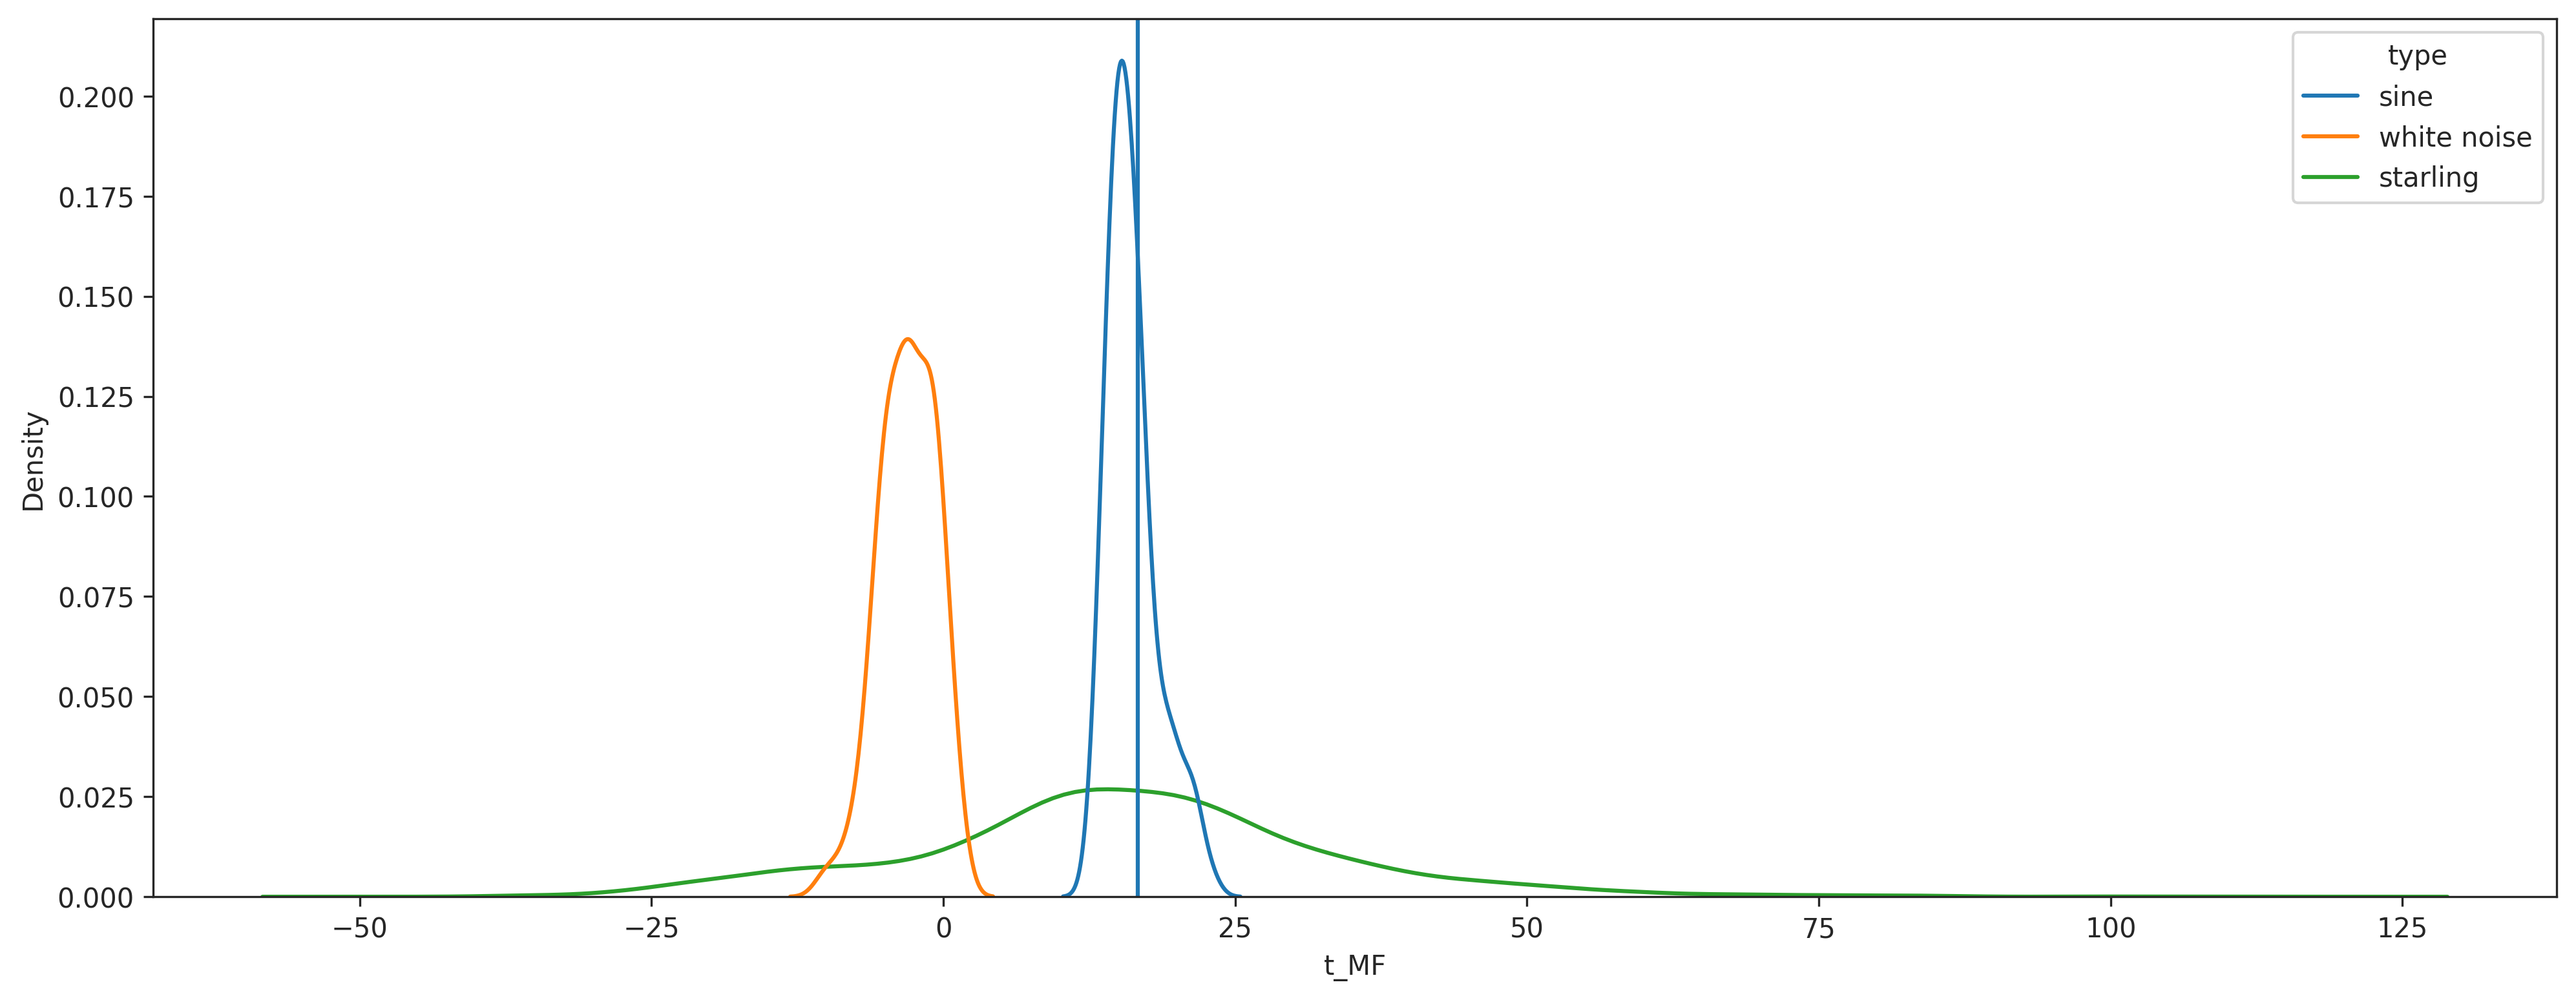

In [133]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')



sns.kdeplot(data = amal.reset_index(), x = 'tmf', color = 'black', hue = 'type', common_norm = False)

plt.axvline(x=mean_confidence_interval(sine_tmf)[2])
plt.xlabel('t_MF')

Text(0.5, 0, 't_MF')

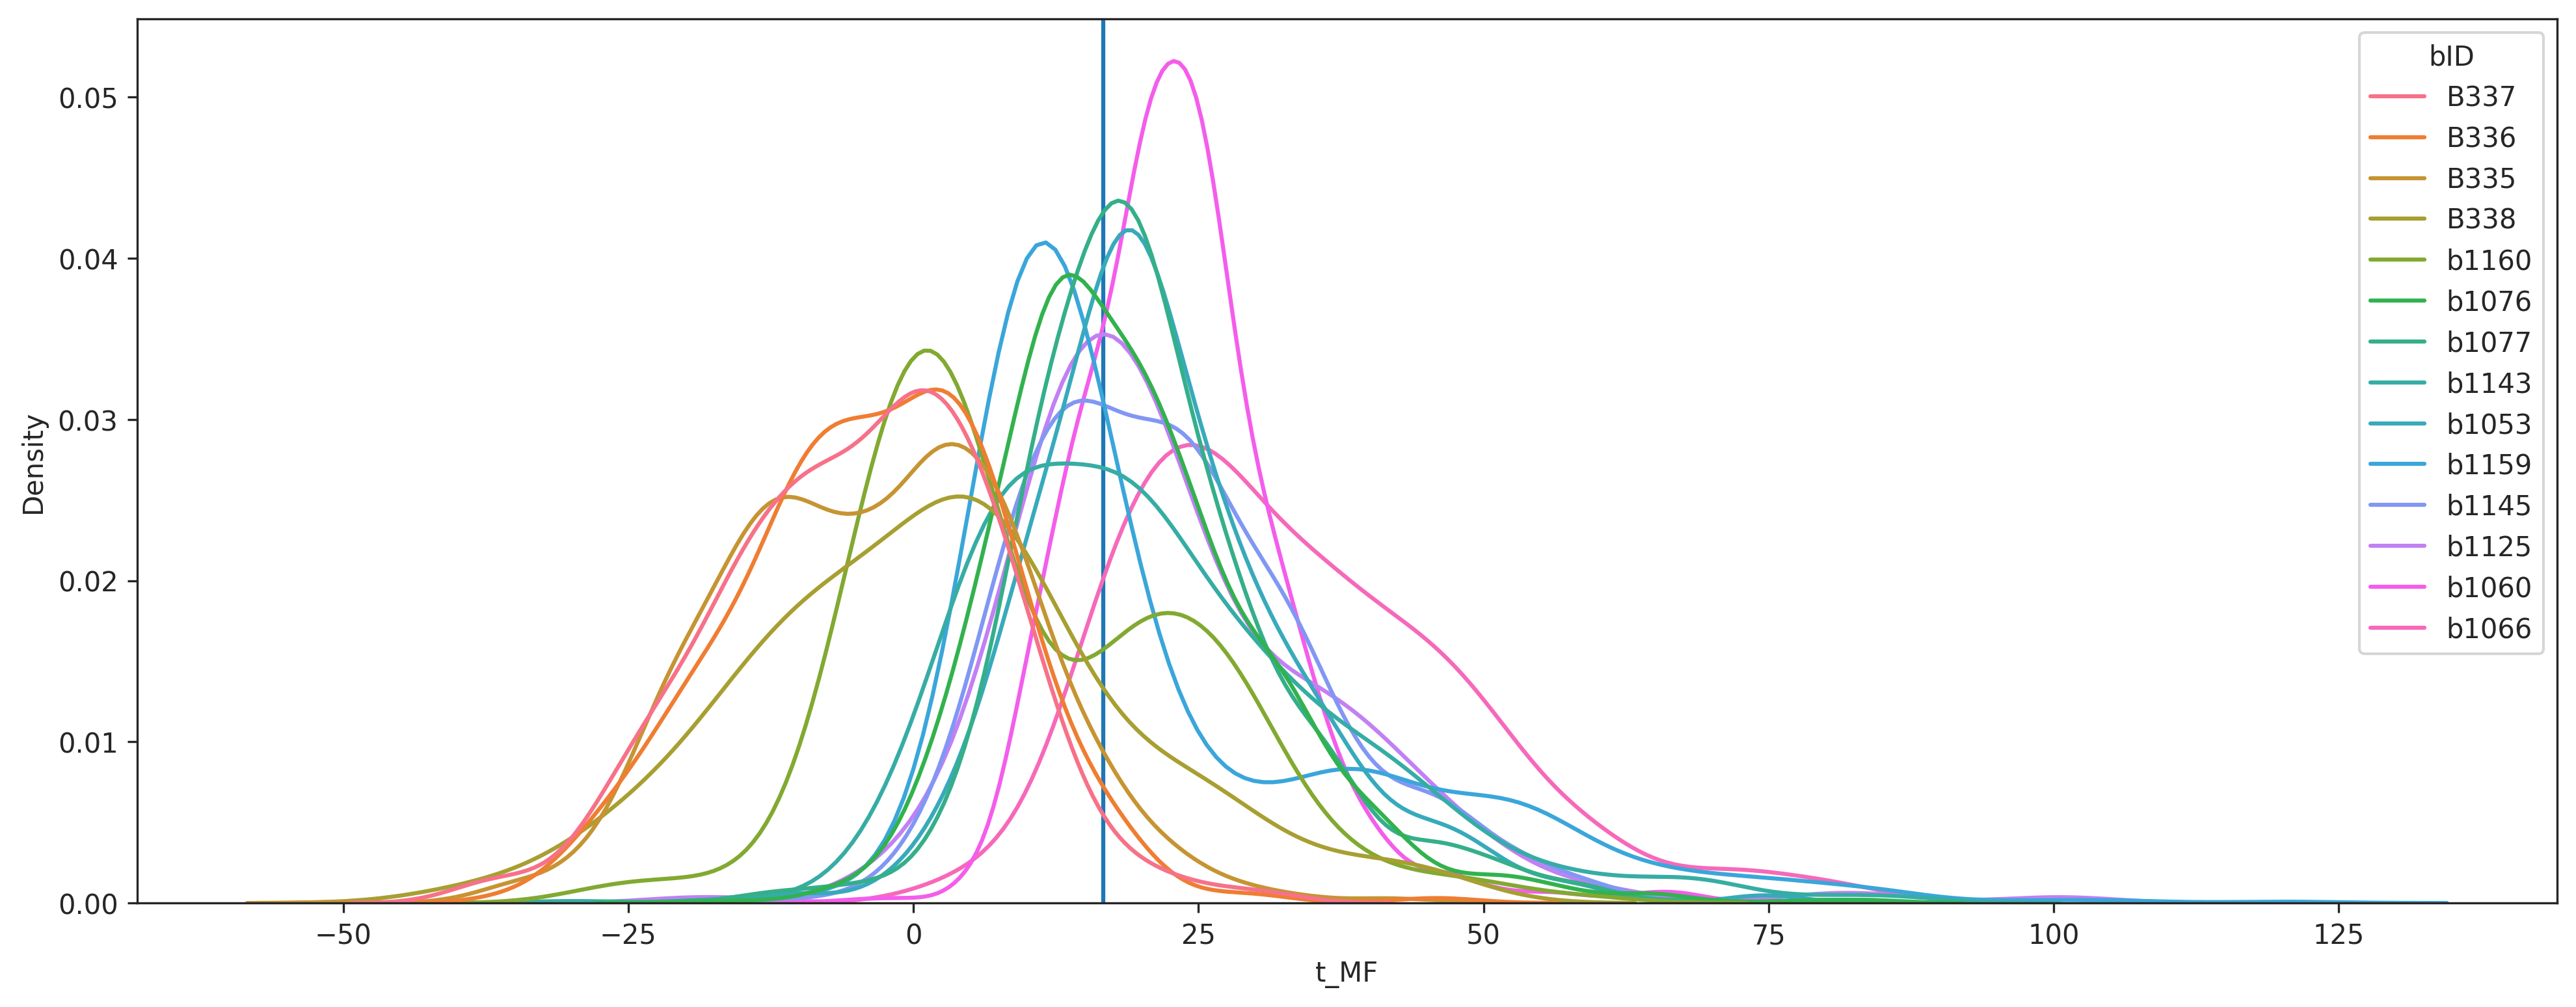

In [134]:
### distribution?
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.rcParams['patch.edgecolor'] = 'none'
figure(figsize = (16, 6), dpi = 300)
sns.set_style('ticks')

plt.axvline(x=mean_confidence_interval(sine_tmf)[2])
sns.kdeplot(data = select, x = 'tmf', hue = 'bID', color = 'bID', common_norm = False, hue_order = alpha_list)
plt.xlabel('t_MF')

In [74]:
bird_average = []

for bID in np.unique(select['bID'].values):
    subframe = select[select['bID'] == bID]
    bird_average.append([np.mean(subframe['tmf']), bID])

In [75]:
bird_average.sort()
bird_average

[[-4.688214014605427, 'B337'],
 [-3.5862804046235364, 'B336'],
 [-3.1995126455043734, 'B335'],
 [2.0568251059518965, 'B338'],
 [9.888303833160323, 'b1160'],
 [19.13824062896487, 'b1076'],
 [20.84561800590809, 'b1077'],
 [21.444820428159904, 'b1143'],
 [21.945195794787526, 'b1053'],
 [22.331208551466187, 'b1159'],
 [22.409473000236424, 'b1145'],
 [22.731119684037786, 'b1125'],
 [23.363680495686104, 'b1060'],
 [33.490107462238726, 'b1066']]

In [79]:
alpha_list = [ls[1] for ls in bird_average]

In [80]:
alpha_list

['B337',
 'B336',
 'B335',
 'B338',
 'b1160',
 'b1076',
 'b1077',
 'b1143',
 'b1053',
 'b1159',
 'b1145',
 'b1125',
 'b1060',
 'b1066']

In [81]:
#  Returns tuple of handles, labels for axis ax, after reordering them to conform to the label order `order`, and if unique is True, after removing entries with duplicate labels.
def reorderLegend(ax=None,order=None,unique=False):
    if ax is None: ax=plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0])) # sort both labels and handles by labels
    if order is not None: # Sort according to a given list (not necessarily complete)
        keys=dict(zip(order,range(len(order))))
        labels, handles = zip(*sorted(zip(labels, handles), key=lambda t,keys=keys: keys.get(t[0],np.inf)))
    if unique:  labels, handles= zip(*unique_everseen(zip(labels,handles), key = labels)) # Keep only the first of each handle
    ax.legend(handles, labels)
    return(handles, labels)


def unique_everseen(seq, key=None):
    seen = set()
    seen_add = seen.add
    return [x for x,k in zip(seq,key) if not (k in seen or seen_add(k))]

In [96]:
## add constant tone

In [138]:
freq = []
sines = []
for i in tqdm(np.arange(1, 101)):
    start_time = 0
    end_time = 10
    sample_rate = 48000
    time = np.arange(start_time, end_time, 1/sample_rate)
    theta = 0
    frequency = 100 * i
    freq.append(frequency)
    amplitude = 1
    sinewave = amplitude * np.sin(2 * np.pi * frequency * time + theta)
    sines.append(sinewave)

100%|██████████| 100/100 [00:02<00:00, 41.49it/s]


In [140]:
sines = pd.DataFrame(
    {
        'freq' : freq,
        'sine' : sines
    }
)

In [141]:
sines['sine'].values[0]

array([ 0.        ,  0.0130896 ,  0.02617695, ..., -0.03925982,
       -0.02617695, -0.0130896 ])

In [154]:
from starling_rhythm.utils.audio import extract_amp_env

In [155]:
extract_amp_env(sines['sine'].values[0], target_sr = 200)

array([0.00110278, 0.50971063, 0.99675292, ..., 0.93526295, 1.        ,
       0.        ])

In [156]:
plt.plot(extract_amp_env(sines['sine'].values[0], target_sr = 200, reduce_noise = False))

TypeError: extract_amp_env() got an unexpected keyword argument 'reduce_noise'

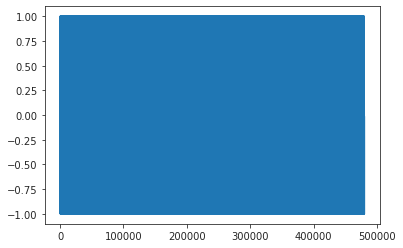

In [150]:
plt.plot(sines['sine'].values[0])

In [137]:
sines

,tmf,bID,type
0,22.869327,sine,sine
1,20.323790,sine,sine
2,21.379105,sine,sine
3,19.700972,sine,sine
4,21.549094,sine,sine
...,...,...,...
95,16.373343,sine,sine
96,14.469963,sine,sine
97,14.209326,sine,sine
98,14.104823,sine,sine


In [103]:
with Parallel(n_jobs = n_jobs, verbose = verbose) as parallel:
    sine_tmf = parallel(
        delayed(tmf)(
            address,
            ns = 32,
            amp_env_sr = 200,
            hilbert_artifacts = True
        )
        for address in tqdm(sines['sine'], desc = 'getting all the real ones')
    )

getting all the real ones: 100%|██████████| 100/100 [00:12<00:00,  7.98it/s]


In [113]:
sines = pd.DataFrame(
    {
        'tmf' : sine_tmf
    }
)

In [114]:
sines['bID'] = 'sine'
sines['type'] = 'sine'